In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-or-ham-a-dataset-for-email-classification/dataset/enron3.csv
/kaggle/input/spam-or-ham-a-dataset-for-email-classification/dataset/enron2.csv
/kaggle/input/spam-or-ham-a-dataset-for-email-classification/dataset/enron1.csv
/kaggle/input/spam-or-ham-a-dataset-for-email-classification/dataset/enron4.csv
/kaggle/input/spam-or-ham-a-dataset-for-email-classification/dataset/enron5.csv
/kaggle/input/spam-or-ham-a-dataset-for-email-classification/dataset/enron6.csv
/kaggle/input/spam-or-ham-a-dataset-for-email-classification/dataset/combined_enron.csv


# Imports
Firstly, all necessary libraries are imported.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Data Retrieval
We retrieve e-mail data for spam and ham classification with the help of pandas library.

In [3]:
df = pd.read_csv("/kaggle/input/spam-or-ham-a-dataset-for-email-classification/dataset/combined_enron.csv")

# Numerical EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33702 entries, 0 to 33701
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      33702 non-null  object
 1   label_num  33702 non-null  int64 
 2   text       33702 non-null  object
dtypes: int64(1), object(2)
memory usage: 790.0+ KB


We have 33702 e-mail entries. Each e-mail entry has 3 cloumns. "label" column keeps the spam-ham classification. "label_num" column also keeps the spam-ham classification but in integer format as 1 representing spam and 0 representing ham. "text" column keeps the contents of the e-mail.

In [5]:
df.describe()

,label_num
count,33702.000000
mean,0.509080
std,0.499925
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


With the describe method from pandas library, we can observe that almost half of the dataset consists of spam e-mails and the majority of e-mails are spam.

In [6]:
df.head()

,label,label_num,text
0,ham,0,subject fw weather sites this is the list of w...
1,spam,1,subject i cant believe the changma wow wow wow...
2,spam,1,subject 4 color printing special request addit...
3,spam,1,subject nobody can beat us poloponybreakaway i...
4,ham,0,subject energy extravaganza 2 weeks away energ...


First 5 entries in the dataset are shown above as an example.

# Visual EDA

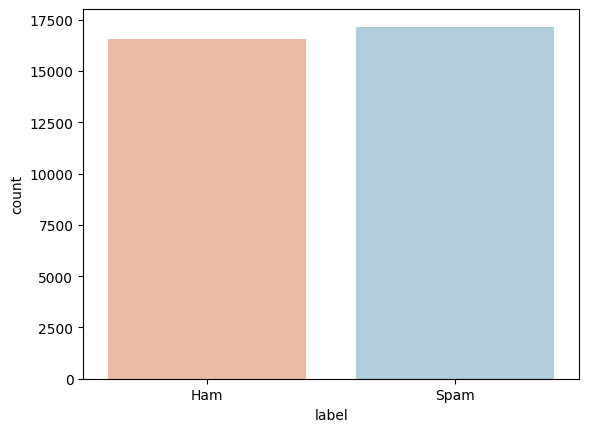

In [7]:
plt.figure()
sns.countplot(x="label", data=df, palette="RdBu")
plt.xticks([0, 1], ["Ham", "Spam"])
plt.show()

With the help of visual EDA, we can conclude the same result with numerical EDA. There are a little more spam e-mails then ham e-mails. Also, there is no corrupted or unexpected data.

# Data Preprocessing

In [8]:
for index, row in df.iterrows():
    if row["label"] == "spam" and row["label_num"] != 1:
        row["label_num"] = 1
        print("Changed")
    elif row["label"] == "ham" and row["label_num"] != 0:
        row["label_num"] = 0
        print("Changed")

Just to be sure with the number labeling all rows are checked in a loop and changed if they are wrong for any reason. label_num data seems to be intact since "Changed" string hasn't been printed even once. Now we can safely remove the label column.

In [9]:
df = df.drop("label", axis=1)
df.head()

,label_num,text
0,0,subject fw weather sites this is the list of w...
1,1,subject i cant believe the changma wow wow wow...
2,1,subject 4 color printing special request addit...
3,1,subject nobody can beat us poloponybreakaway i...
4,0,subject energy extravaganza 2 weeks away energ...


# Train-Test Split
30% of our data is split as test data below.

In [10]:
y = df["label_num"]
X = df["text"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# CountVectorizer
For this classification, I want to use how many times each word appears. So, all e-mail texts will be broken to their words by CountVectorizer method in scikit learn library.

In [11]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Multinomial Naive Bayes
Train data is fit to Multinomial Naive Bayes classifier and test data is predicted using that model.

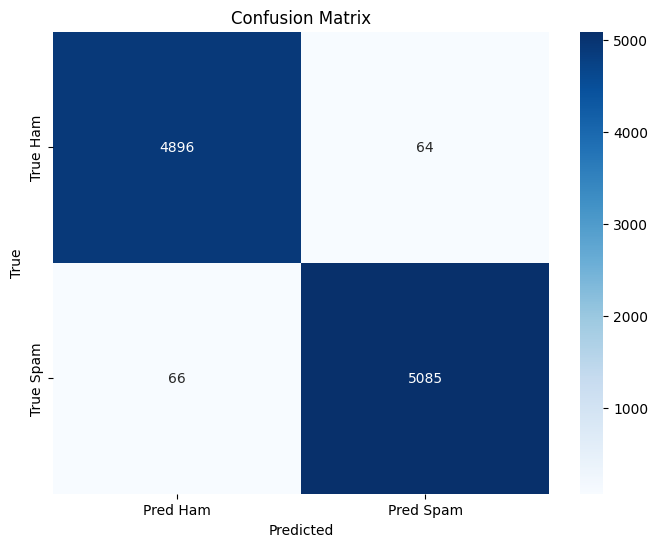

,precision,recall,f1-score,support
0,0.986699,0.987097,0.986898,4960.000000
1,0.987570,0.987187,0.987379,5151.000000
accuracy,0.987143,0.987143,0.987143,0.987143
macro avg,0.987135,0.987142,0.987138,10111.000000
weighted avg,0.987143,0.987143,0.987143,10111.000000


In [12]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_cv, y_train)
y_pred = multinomial_nb.predict(X_test_cv)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Ham', 'Pred Spam'], yticklabels=['True Ham', 'True Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
cr = classification_report(y_test,y_pred, output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
cr_df

Multinomial Naive Bayes model predicted the labels with 99% accuracy. Confusion matrix and classification report are shown above.

## Cross Validation for Multinomial Naive Bayes
With grid search hyperparameter cross validation, we can find the best alpha value for this model. Alpha values are iterated through 0.1 to 5.0. It is observed that 0.1 is the best value for alpha.

In [13]:
alpha = []
for i in range(50):
    alpha.append((i+1)/10)
grid_param = {"alpha": alpha}
grid_search = GridSearchCV(estimator=multinomial_nb, param_grid=grid_param, cv=5, scoring="accuracy")
grid_search.fit(X_train_cv, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_score = grid_search.best_score_
print("Best score is: ", best_score)

Best parameters found:  {'alpha': 0.1}
Best score is:  0.9880462582108118


# KNN
Same data is used for KNN with 3 neighbours

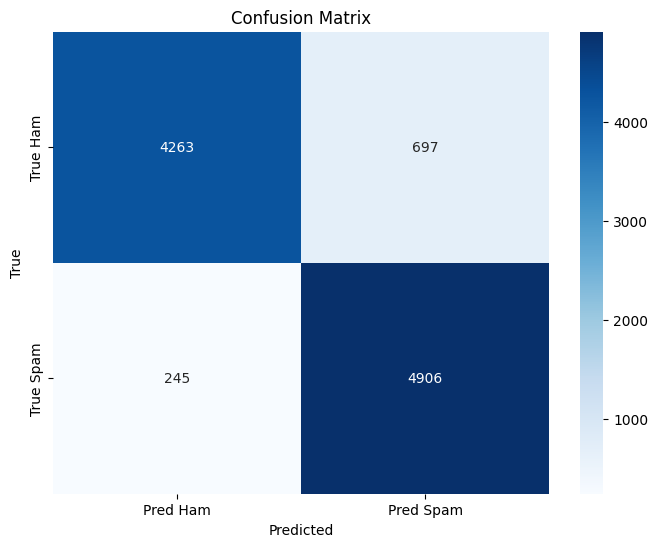

,precision,recall,f1-score,support
0,0.945652,0.859476,0.900507,4960.000000
1,0.875602,0.952436,0.912405,5151.000000
accuracy,0.906834,0.906834,0.906834,0.906834
macro avg,0.910627,0.905956,0.906456,10111.000000
weighted avg,0.909966,0.906834,0.906568,10111.000000


In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_cv, y_train)
y_pred = knn.predict(X_test_cv)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Ham', 'Pred Spam'], yticklabels=['True Ham', 'True Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
cr = classification_report(y_test,y_pred, output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
cr_df

KNN model predicted the labels with 91% accuracy. Confusion matrix and classification report are shown above.

## Cross Validation for KNN
With grid search hyperparameter cross validation, we can find the best neighbor number value for this model. Neighbor number values are iterated through 1 to 10. Higher values could also be observed. Though, 10 is selected to decrease runtime a bit since KNN model runs slower than Naive Bayes model. It is observed that 1 is the best value for neighbor number.

In [15]:
pipeline = Pipeline([('knn', KNeighborsClassifier())])
grid_param = {'knn__n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator=pipeline, param_grid=grid_param, cv=5, scoring="accuracy")
grid_search.fit(X_train_cv, y_train)
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_score = grid_search.best_score_
print("Best score is: ", best_score)

Best parameters found:  {'knn__n_neighbors': 1}
Best score is:  0.909584319106844


# Conclusion
Multinomial Naive Bayes has more accuracy compared to KNN. Though, this doesn't necessarily mean it is a better model. 99% accuracy might be unrealistically high and it could possibly mean the model just memorizes which words appear in which kind of mails and determine the classes based on that information. It might not be too reliable. Best result was obtained with 0.1 which is default alpha value for this model. KNN also got a high accuracy score of 91%. This seems more reasonable at first glance. Initially, 3 was used as the neighbor number. However, KNN with 1 neighbor has slightly more accuracy compared to the one with 3 neighbors. This means mails tend to be similar with only a few of the other mails. Overall, lack of relation might be possible. More preprocessing such as removing certain words could be done to make the models more realistic. Though, that approach would need more analysis to be able to remove the correct words to not lose too much meaning. Due to the time constraints of words are not removed but it will be considered if future iterations are performed. One other note to make this project more realistic could be implementing a neural network to be able to also check the context of words. However, as a basic machine learning project, that idea is not suitable for this project and it is left to future more advanced projects.